|Name           |Data Type | Meas. | Description                |
|---------------|----------|-------|----------------------------|
|Sex            |nominal   |       |M, F, and I (infant)        |
|Length         |continuous| mm    |Longest shell measurement   |
|Diameter       |continuous| mm    |perpendicular to length     |
|Height         |continuous| mm    |with meat in shell          |
|Whole weight   |continuous| grams |whole abalone               |
|Shucked weight |continuous| grams |weight of meat              |
|Viscera weight |continuous| grams |gut weight (after bleeding) |
|Shell weight   |continuous| grams |after being dried           |
|Rings          |integer   | +1.5  |gives the age in years      |
|Age (computed) |integer   | yrs   |computed from rings         |

In [77]:
import numpy  as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

def get_number_suffix(x):
    # Given an integer; return the english ordinal suffix string
    suffixes = ["th", "st", "nd", "rd"]
    mod_x    = x % 10
    
    return suffixes[mod_x]  if x not in [11, 12, 13] and mod_x in [1, 2, 3] else  suffixes[0]

In [78]:
filename  = "abalone.data.txt"
col_names = ["SEX", "LENGTH", "DIAMETER", "HEIGHT", "WHOLE_WEIGHT", "SHUCKED_WEIGHT", "VISCERA_WEIGHT", "SHELL_WEIGHT", "RINGS"]
df        = pd.read_csv("abalone.data.txt", names = col_names)
df["AGE"] = df.RINGS + 1.5 
df.head()

,SEX,LENGTH,DIAMETER,HEIGHT,WHOLE_WEIGHT,SHUCKED_WEIGHT,VISCERA_WEIGHT,SHELL_WEIGHT,RINGS,AGE
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


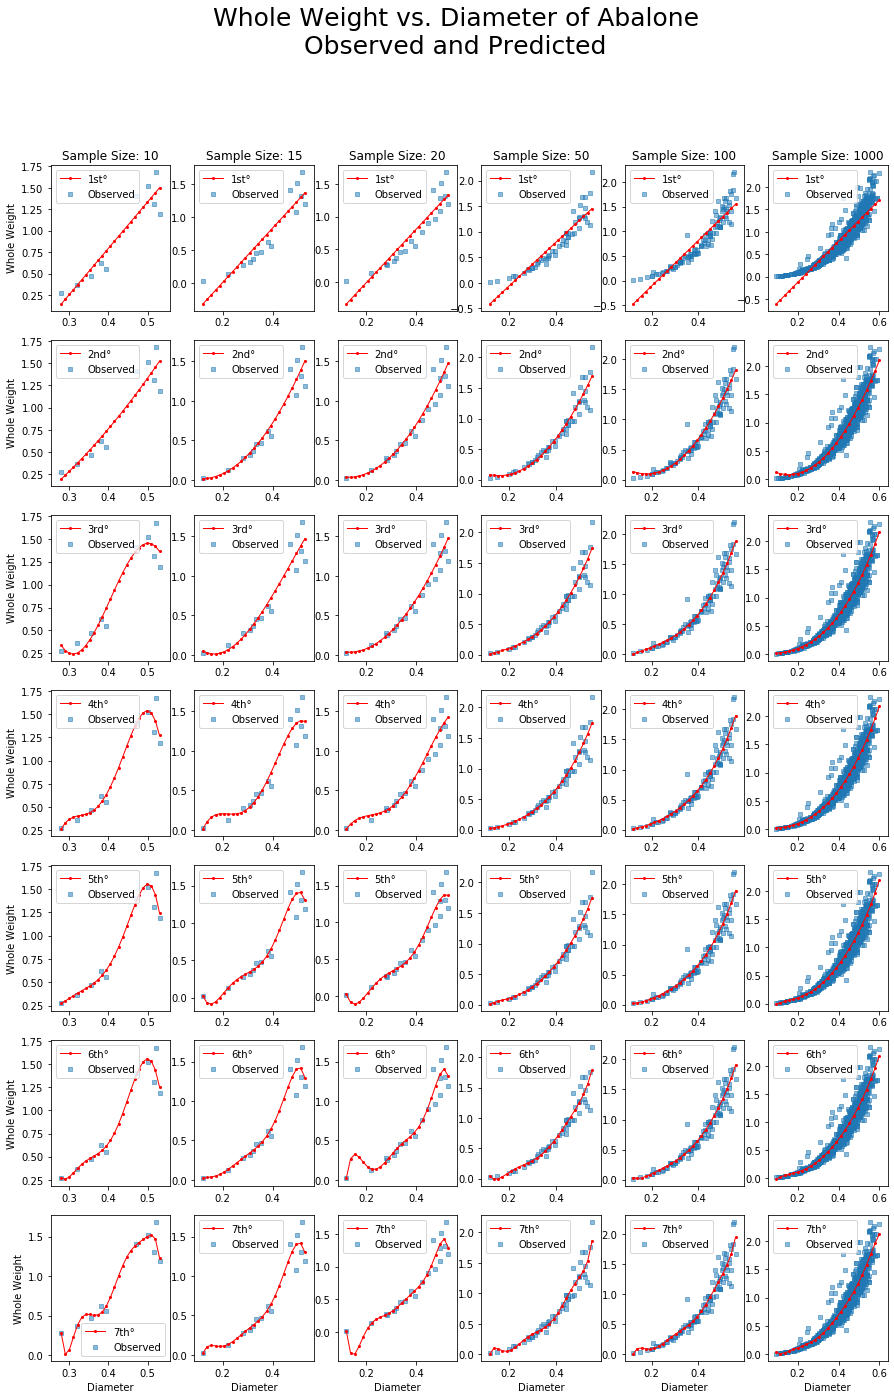

In [114]:
sample_sizes            = [10, 15, 20, 50, 100, 1000]
polynomial_degrees      = [1, 2, 3, 4, 5, 6, 7]
number_samples_to_model = 25

fig, axes               = plt.subplots(nrows=len(polynomial_degrees), ncols=len(sample_sizes), figsize=(15,22))
for row_number, sample_size in enumerate(sample_sizes):
    # Select sample of data
    np.random.seed(10)
    sample_indices      = np.random.choice(df.DIAMETER.size,sample_size)
    sample_diameter     = df.DIAMETER[sample_indices]
    sample_whole_weight = df.WHOLE_WEIGHT[sample_indices]
    
    for col_number, degree_of_polynomial_to_fit in enumerate(polynomial_degrees):
        coefficients             = np.polyfit(sample_diameter, sample_whole_weight, degree_of_polynomial_to_fit)
        diameter_sample_for_plot = np.linspace(sample_diameter.min(), sample_diameter.max(), number_samples_to_model)
        model_for_mass           = np.poly1d(coefficients)
        mass_prediction          = model_for_mass(diameter_sample_for_plot)
        
        # Plot observed and model data
        axes[col_number][row_number].scatter(
            x      = sample_diameter,
            y      = sample_whole_weight, 
            marker = ',', 
            s      = 10, 
            alpha  = 0.5,
            label  = 'Observed'
        )
        axes[col_number][row_number].plot(
            diameter_sample_for_plot,
            mass_prediction,
            color      = 'red',
            label      = '%d%s°' % (degree_of_polynomial_to_fit, get_number_suffix(degree_of_polynomial_to_fit)),
            linewidth  = 1,
            markersize = 2,
            linestyle  = '-',
            marker     = 'o'
            
        )
        
        # Add Axis Labels to outer plots only
        if col_number == len(polynomial_degrees) - 1: axes[col_number,row_number].set_xlabel('Diameter')
        if row_number == 0:                           axes[col_number,row_number].set_ylabel('Whole Weight')
        if col_number == 0:                           axes[col_number,row_number].set_title("Sample Size: %d" % sample_size)
        
        # Add legend to subplot
        axes[col_number,row_number].legend(loc='best')
        
fig.suptitle('Whole Weight vs. Diameter of Abalone\nObserved and Predicted', fontsize = 25)
plt.show()